# Churn Risk Prediction
<!--  -->  
predict the churn risk score of a customer.

In [1]:
# Imprt essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cd/users/prave/datasets/csv files/churn risk prediction

C:\users\prave\datasets\csv files\churn risk prediction


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# Exploring Dataset

In [4]:
print("Train data shape: {}".format(train.shape))
print('Test data shape: {}'.format(test.shape))

Train data shape: (36992, 25)
Test data shape: (19919, 24)


In [5]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [6]:
test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

**Note:** we have **null values** in the dataset.and in some other features null values are present in the form of **?,Unknown,etc..**

In [8]:
train.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.000,26.000000
avg_time_spent,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.515,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
points_in_wallet,33549.0,686.882199,194.063624,-760.661236,616.1500,697.620,763.950,2069.069761
churn_risk_score,36992.0,3.463397,1.409661,-1.000000,3.0000,4.000,5.000,5.000000


# Exploarating Data analysis & Cleaning               
<!--  -->              
* Removing unwanted columns            
* Merge train and test dataset
* plotting visuals to get better insight        

In [10]:
train['test_data']=0
test['test_data']=1
test['churn_risk_score']=np.NaN
df=pd.concat([train,test],ignore_index=True)

# Removing unwanted columns
df.drop(['customer_id','Name','security_no','referral_id','medium_of_operation','internet_option','last_visit_time',
        'joining_date','days_since_last_login','offer_application_preference'],axis=1,inplace=True)

In [11]:
# converting unnecessary values into NaN
df['joined_through_referral']=df['joined_through_referral'].apply(lambda x:np.NaN if x=='?' else x)
df['gender']=df['gender'].apply(lambda x:np.NaN if x=='Unknown' else x)

In [12]:
# Imputing NaN values 
df['points_in_wallet'].fillna(df['points_in_wallet'].mean(),inplace=True)
df['region_category'].fillna(df['region_category'].mode()[0],inplace=True)
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0],inplace=True)
df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0],inplace=True)
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [13]:
df.isna().sum().sort_values(ascending=False)

churn_risk_score            19919
age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
past_complaint                  0
complaint_status                0
feedback                        0
test_data                       0
dtype: int64

In [14]:
# Covert "avg_frequency_login_days" column dtype from object to float
df['avg_frequency_login_days'].replace({'Error':-999},inplace=True)
df['avg_frequency_login_days']=df['avg_frequency_login_days'].astype(float)

# Visualization

<AxesSubplot:xlabel='region_category', ylabel='count'>

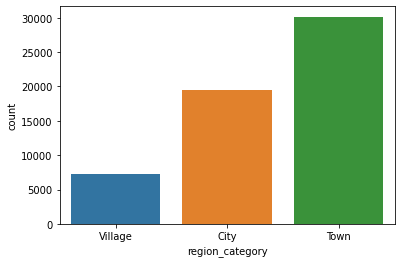

In [15]:
sns.countplot(x='region_category',data=df)

**Insight:**             
* Most of the customers are from **Town**

In [16]:
# Target variable distribution
def barchart(feature):
    churn_neg=df[(df['test_data']==0) & (df['churn_risk_score']==-1)][feature].value_counts()
    churn_1=df[(df['test_data']==0) & (df['churn_risk_score']==1)][feature].value_counts()
    churn_2=df[(df['test_data']==0) & (df['churn_risk_score']==2)][feature].value_counts()
    churn_3=df[(df['test_data']==0) & (df['churn_risk_score']==3)][feature].value_counts()
    churn_4=df[(df['test_data']==0) & (df['churn_risk_score']==4)][feature].value_counts()
    churn_5=df[(df['test_data']==0) & (df['churn_risk_score']==5)][feature].value_counts()
    temp_data=pd.DataFrame([churn_neg,churn_1,churn_2,churn_3,churn_4,churn_5])
    temp_data.index=['churn_neg','churn_1','churn_2','churn_3','churn_4','churn_5']
    temp_data.plot(kind='bar',stacked=True,figsize=(10,5))

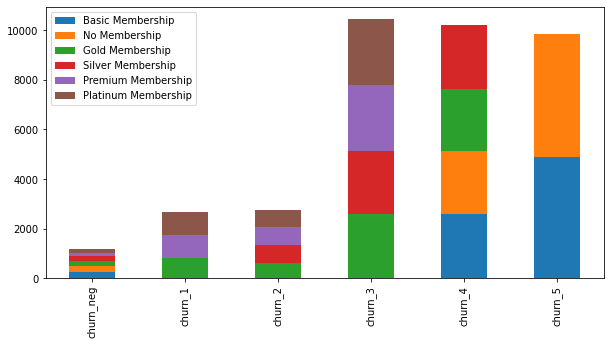

In [17]:
barchart('membership_category')

**Insight:**             
* membership **Basic Membership and No Membership** have high chances to churn.         

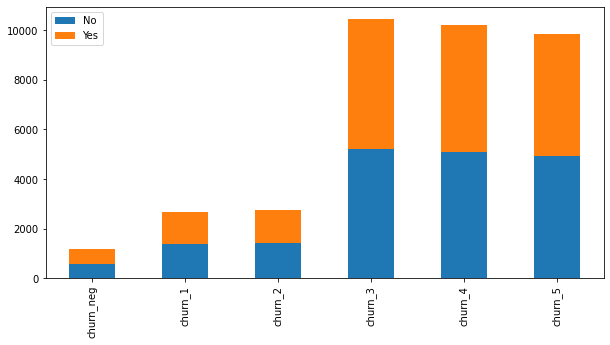

In [18]:
barchart('past_complaint')

**Insight:**           
* From churn_score **3 to 5** past_compalints are increased 2x.compared to churn_score **1 and 2**

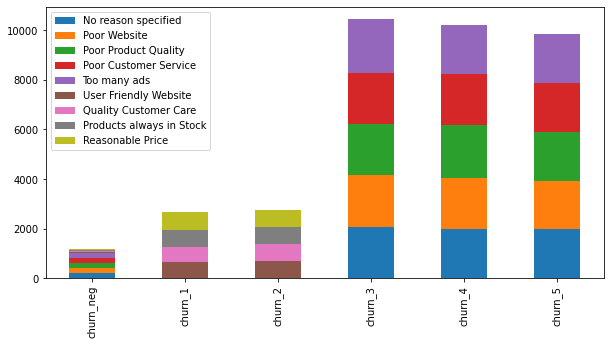

In [19]:
barchart('feedback')

**Insight:**             
* Intreseting thing is from churn_score **3 to 5**,there is not even one positive feedback has came.          

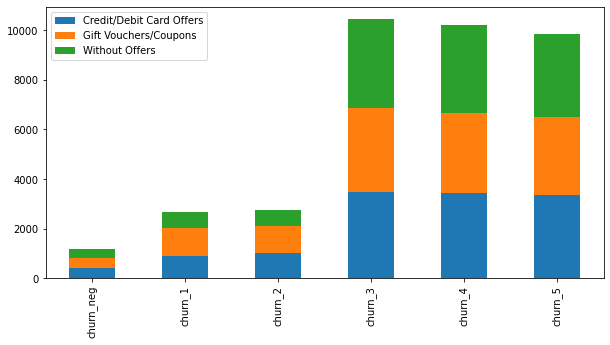

In [20]:
barchart('preferred_offer_types')

**Insight:**             
* Churn_score **3 to 5 Without offers** preffered offer type is started drecresing.which means this category people wants buy products only with offer preferred type only.

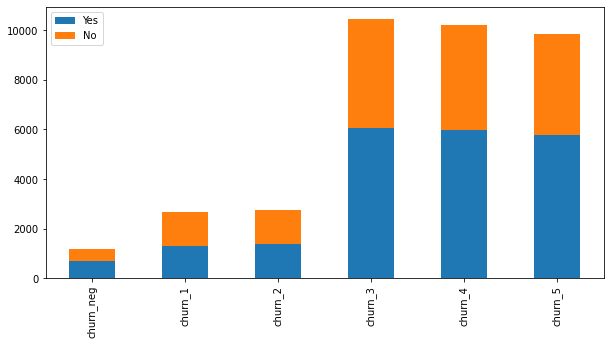

In [21]:
barchart('joined_through_referral')

**Insight:**          
* from churn_score **3 to 5** people joined through referral is higher than not

<AxesSubplot:xlabel='churn_risk_score', ylabel='avg_transaction_value'>

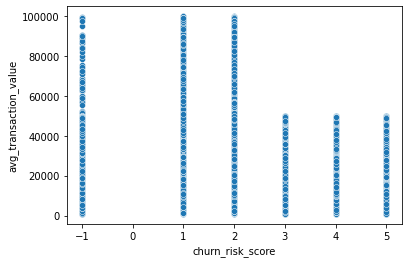

In [22]:
sns.scatterplot(x='churn_risk_score',y='avg_transaction_value',data=df)

**Insight:**            
* If avg_transaction_value **decreases**,churn risk score **increases**

# Feature engineering

In [23]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
def enc(x):
    l=LabelEncoder()
    df[x]=l.fit_transform(df[x])
columns=['membership_category','preferred_offer_types','complaint_status','feedback','region_category']
for i in columns:
    enc(i)

In [24]:
# Handling categorical features
df['gender'].replace({'F':0,'M':1},inplace=True)
df['joined_through_referral'].replace({'No':0,'Yes':1},inplace=True)
df['used_special_discount'].replace({'Yes':1,'No':0},inplace=True)
df['past_complaint'].replace({'Yes':1,'No':0},inplace=True)

In [25]:
df.shape

(56911, 16)

In [26]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_risk_score,test_data
0,18,0,2,3,0,1,300.63,53005.25,17.0,781.750000,1,0,1,4,2.0,0
1,32,0,0,4,1,1,306.34,12838.38,10.0,686.563762,1,1,2,5,1.0,0
2,44,0,1,2,1,1,516.16,21027.00,22.0,500.690000,0,1,3,3,5.0,0
3,37,1,0,2,1,1,53.27,25239.56,6.0,567.660000,0,1,4,3,5.0,0
4,31,0,0,2,0,0,113.13,24483.66,16.0,663.060000,0,1,2,3,5.0,0


In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier

In [28]:
X_train=df[df['test_data']==0].drop('churn_risk_score',axis=1)
y_train=df[df['test_data']==0]['churn_risk_score']
X_test=df[df['test_data']==1].drop('churn_risk_score',axis=1)
X_train.drop('test_data',axis=1,inplace=True)
X_test.drop(['test_data'],axis=1,inplace=True)


In [29]:
# Feature Engineering with StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

# Model Building

In [30]:
dt=DecisionTreeClassifier()
cv=cross_val_score(dt,X_train_scaled,y_train,cv=10,scoring='accuracy')
print("Average Accuracy: {}".format(round(cv.mean()*100,4)))
print("Score of each cycle: {}".format(cv))


Average Accuracy: 71.1289
Score of each cycle: [0.71216216 0.70216216 0.71154366 0.69964855 0.71046229 0.71965396
 0.72316842 0.69586375 0.72154636 0.71668018]


In [31]:
knn=KNeighborsClassifier()
cv=cross_val_score(knn,X_train_scaled,y_train,cv=10,scoring='accuracy')
print("Average Accuracy: {}".format(round(cv.mean()*100,4)))
print("Score of each cycle: {}".format(cv))

Average Accuracy: 44.8934
Score of each cycle: [0.4572973  0.45675676 0.43579346 0.44579616 0.45904298 0.45390646
 0.44120032 0.4422817  0.44038929 0.45688024]


In [32]:
rf=RandomForestClassifier()
cv=cross_val_score(rf,X_train_scaled,y_train,cv=10,scoring='accuracy')
print("Average Accuracy: {}".format(round(cv.mean()*100,4)))
print("Score of each cycle: {}".format(cv))

Average Accuracy: 74.8405
Score of each cycle: [0.74810811 0.74486486 0.74614761 0.74776967 0.75155447 0.74831035
 0.74776967 0.74614761 0.7523655  0.75101379]


In [33]:
xgb=XGBClassifier()
cv=cross_val_score(xgb,X_train_scaled,y_train,cv=10,scoring='accuracy')
print("Average Accuracy: {}".format(round(cv.mean()*100,4)))
print("Score of each cycle: {}".format(cv))

[19:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# Submission

In [38]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled,y_train)
prediction=xgb.predict(X_test_scaled)

submission=pd.DataFrame({'customer_id':test['customer_id'],'prediction':prediction})
submission.to_csv('xgb_submission.csv')

[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
submission.head(10)

,customer_id,prediction
0,fffe43004900440031003700300030003400,3.0
1,fffe43004900440031003900370037003300,3.0
2,fffe43004900440034003800360037003000,4.0
3,fffe43004900440036003200370033003400,3.0
4,fffe43004900440035003000370031003900,5.0
5,fffe43004900440035003700330030003600,5.0
6,fffe43004900440034003500360031003900,2.0
7,fffe430049004400320031003000,4.0
8,fffe43004900440034003100320030003300,3.0
9,fffe4300490044003500320033003500,5.0
